In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("/home/parth/Data Science/Machine Learning/Dataset/Height_Weight_Dataset.csv")

In [5]:
data.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


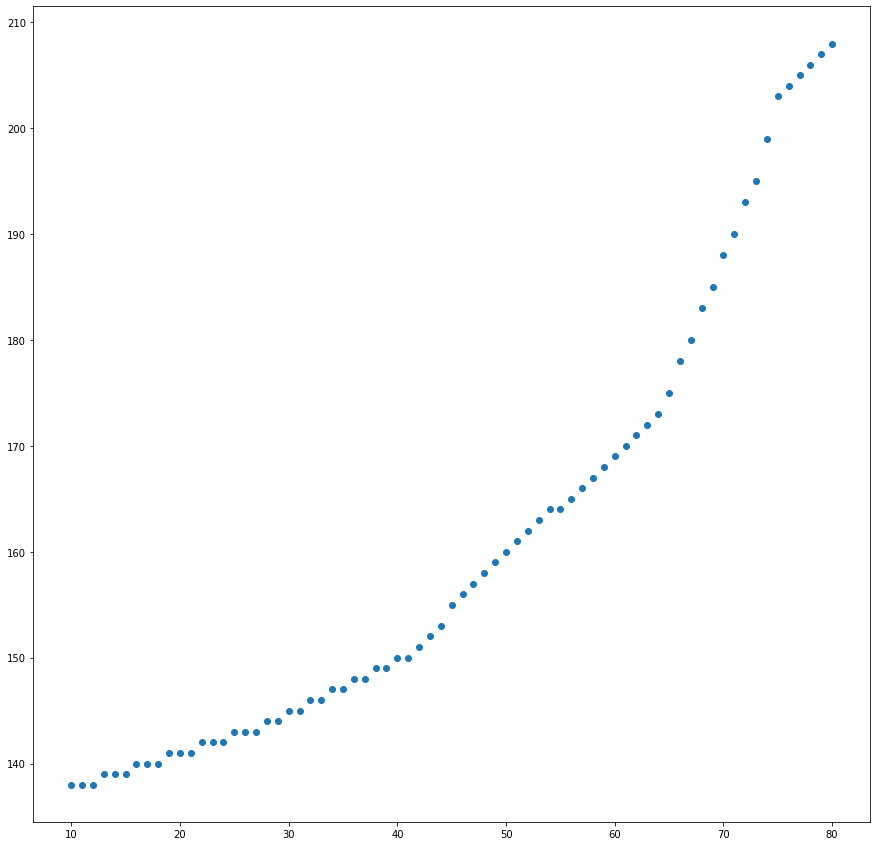

In [23]:
x=data["Age"]
y=data["Height"]
plt.figure(figsize=(15,15))
plt.scatter(x,y)
plt.show()

In [47]:
class PolynomialRegression:
    
    def __init__(self,degree):
        self.degree=degree
    
    def make_array(self,x):
        x=x.to_numpy()
        x=x.reshape((x.shape[0],1))
        return x
    
    def get_x(self,x):
        d=self.degree
        #x=self.x
        t1=x
        for i in range(2,d+1):
            t=t1**i
            x=np.append(x,t,axis=1)
            
        t=np.empty([x.shape[0],1])
        t.fill(1)
        x=np.append(t,x,axis=1)
        return x
            
    def get_bmatrix(self):
        feature=self.x.shape[1]
        b=np.empty([feature,1])
        b.fill(0)
        self.b=b
    
    def update_theta(self):
        x=self.x
        y=self.y
        xT=np.transpose(x)
        temp=xT.dot(x)
        tempinv=np.linalg.inv(temp)
        temp1=tempinv.dot(xT)
        self.b=temp1.dot(y)
        
        
    def fit(self,x,y):
        self.x=self.make_array(x)
        self.y=self.make_array(y)
        self.x=self.get_x(self.x)
        self.get_bmatrix()
        self.update_theta()
        
    def predict(self,x1):
        x1=self.make_array(x1)
        x1=self.get_x(x1)
        b=self.b
        y_pred=x1.dot(b)
        return y_pred
        

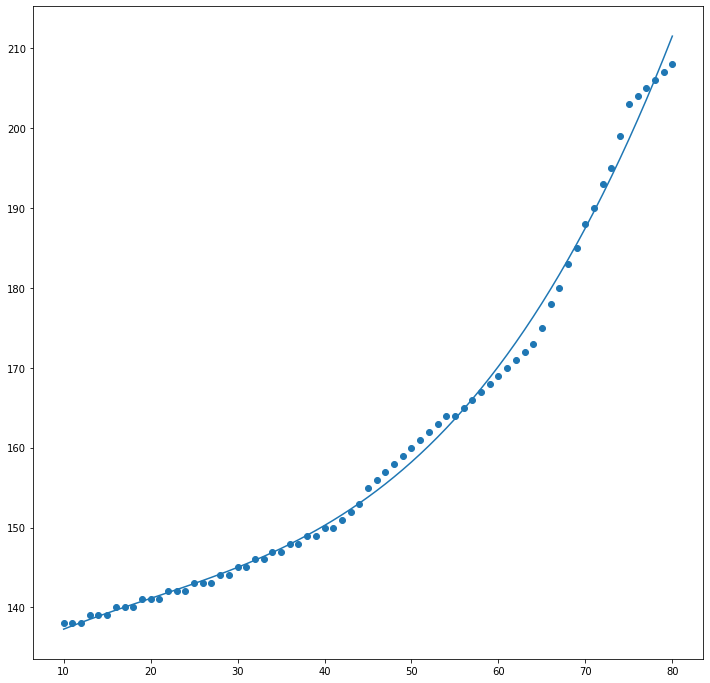

In [81]:
def main():
    l=PolynomialRegression(3)
    
    """
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
    l.fit(x_train,y_train)
    y_pred=l.predict(x_test)
    
    plt.figure(figsize=(12,12));
    plt.scatter(x_test,y_test)
    x_test=x_test.to_numpy()
    x_test=x_test.reshape((x_test.shape[0],1))
    plt.plot(x_test,y_pred.reshape((y_pred.shape[0],1)))
    plt.show()
    """
    l.fit(x,y)
    y_pred=l.predict(x)
    plt.figure(figsize=(12,12));
    plt.scatter(x,y)
    plt.plot(x,y_pred)
    plt.show()
 
if __name__=='__main__':
    main()